In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
csv_url = 'https://raw.githubusercontent.com/AryaVenkatesh2010/AryaAIProject/refs/heads/main/ACPs_Breast_cancer.csv'
data =pd.read_csv(csv_url)

In [ ]:
data.head()

,ID,sequence,class
0,1,AAWKWAWAKKWAKAKKWAKAA,mod. active
1,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active
2,3,AWKKWAKAWKWAKAKWWAKAA,mod. active
3,4,ESFSDWWKLLAE,mod. active
4,5,ETFADWWKLLAE,mod. active


In [ ]:
# Step 2: Preprocessing
# Convert classes to numeric labels
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

In [ ]:
data.head()

,ID,sequence,class
0,1,AAWKWAWAKKWAKAKKWAKAA,2
1,2,AIGKFLHSAKKFGKAFVGEIMNS,2
2,3,AWKKWAKAWKWAKAKWWAKAA,2
3,4,ESFSDWWKLLAE,2
4,5,ETFADWWKLLAE,2


In [ ]:
# Example encoding: Map sequence length as a simple feature
data['sequence_length'] = data['sequence'].apply(len)

In [ ]:
data.head()

,ID,sequence,class,sequence_length
0,1,AAWKWAWAKKWAKAKKWAKAA,2,21
1,2,AIGKFLHSAKKFGKAFVGEIMNS,2,23
2,3,AWKKWAKAWKWAKAKWWAKAA,2,21
3,4,ESFSDWWKLLAE,2,12
4,5,ETFADWWKLLAE,2,12


In [ ]:
# Step 3: Split the data
X = data[['sequence_length']]  # Replace with more advanced features later
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Step 4: Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n")

Confusion Matrix:
 [[  5  12   0   0]
 [  0 150   0   0]
 [  2  18   0   0]
 [  0   3   0   0]]

Classification Report:



In [ ]:
classification_report(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.71      0.29      0.42        17\n           1       0.82      1.00      0.90       150\n           2       0.00      0.00      0.00        20\n           3       0.00      0.00      0.00         3\n\n    accuracy                           0.82       190\n   macro avg       0.38      0.32      0.33       190\nweighted avg       0.71      0.82      0.75       190\n'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



In [ ]:
# Load the dataset
data =pd.read_csv('/content/sample_data/ACPs_Breast_cancer.csv')



# Step 2: Exploratory Data Analysis (EDA)


In [ ]:

# 1. Analyze the distribution of classes
class_counts = data['class'].value_counts()
print("Class Distribution:\n", class_counts)


Class Distribution:
 class
inactive - virtual    750
mod. active            98
inactive - exp         83
very active            18
Name: count, dtype: int64


/tmp/ipython-input-2194933085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


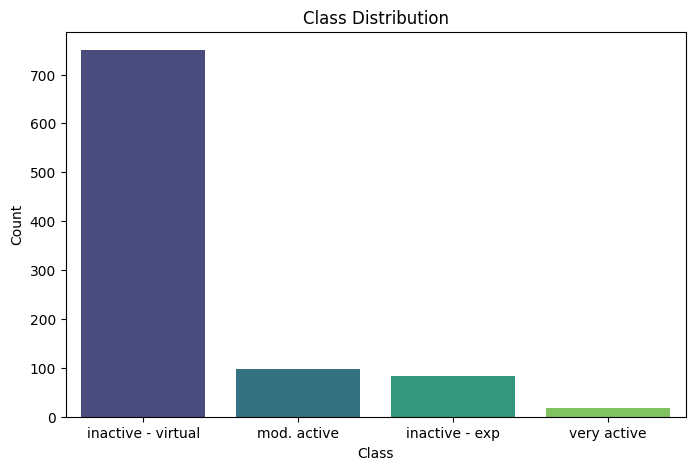

In [ ]:

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



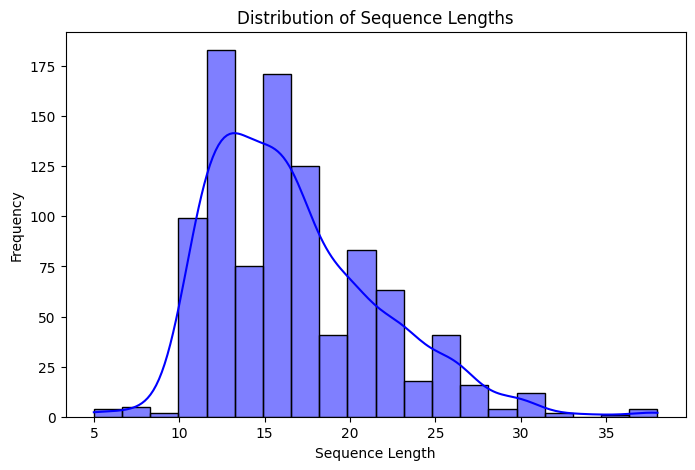

In [ ]:
# 2. Examine sequence lengths
data['sequence_length'] = data['sequence'].apply(len)

# Plot sequence length distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['sequence_length'], bins=20, kde=True, color="blue")
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()



/tmp/ipython-input-2064711071.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(amino_acid_counts.keys()), y=list(amino_acid_counts.values()), palette="coolwarm")


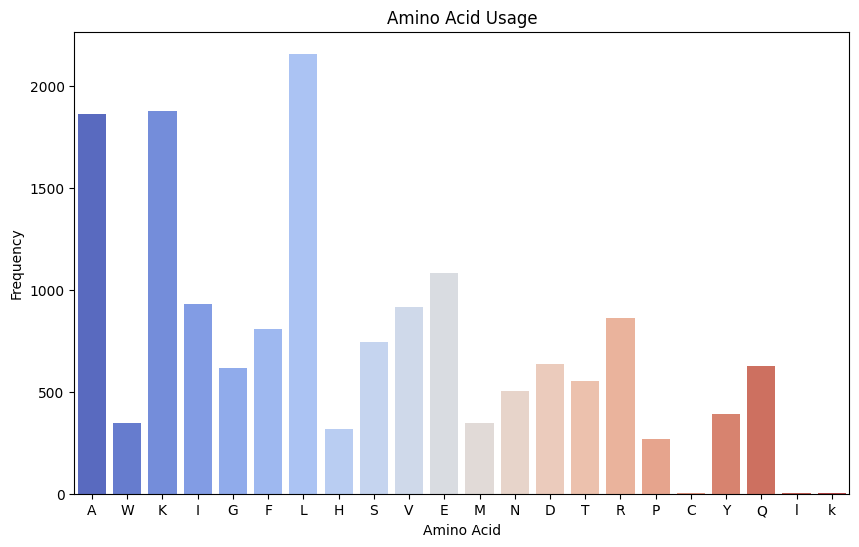

In [ ]:
# 3. Amino acid usage
# Count occurrences of each amino acid
amino_acid_counts = Counter("".join(data['sequence']))

# Plot amino acid usage
plt.figure(figsize=(10, 6))
sns.barplot(x=list(amino_acid_counts.keys()), y=list(amino_acid_counts.values()), palette="coolwarm")
plt.title("Amino Acid Usage")
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.show()



In [ ]:
# 4. Visualize patterns using PCA and t-SNE
# Simplistic numerical representation: Use sequence length and amino acid composition
# Function to calculate composition
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")
def calculate_composition(sequence):
    composition = {aa: sequence.count(aa) / len(sequence) for aa in amino_acids}
    return composition

composition_features = data['sequence'].apply(calculate_composition).apply(pd.Series)
composition_features.fillna(0, inplace=True)

# Combine sequence length and amino acid composition
features = pd.concat([data[['sequence_length']], composition_features], axis=1)



In [ ]:
features.shape

(949, 21)

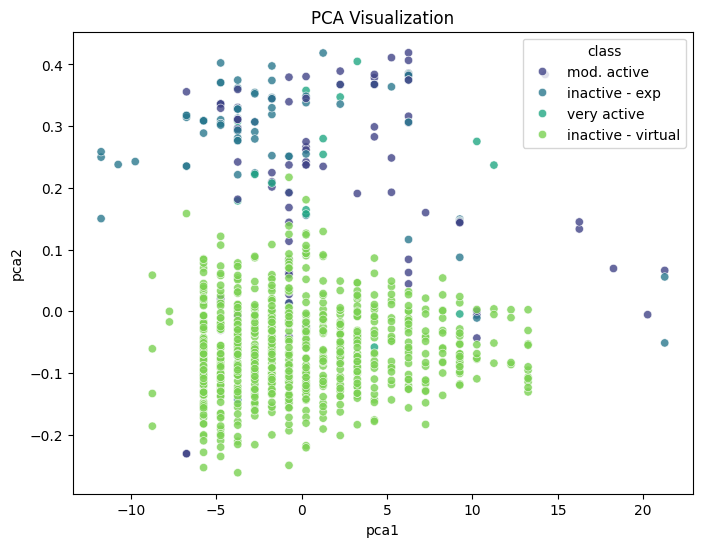

In [ ]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='pca1', y='pca2', hue='class', palette="viridis", alpha=0.8)
plt.title("PCA Visualization")
plt.show()



In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([9.96790540e-01, 8.94807999e-04])

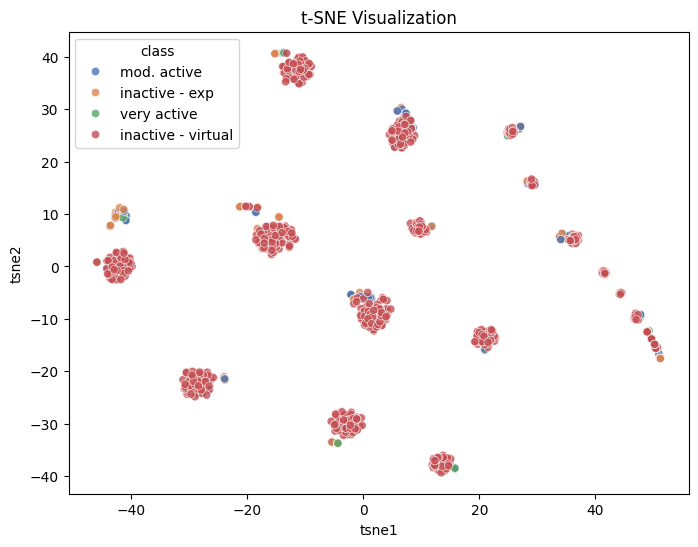

In [ ]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features)
data['tsne1'] = tsne_result[:, 0]
data['tsne2'] = tsne_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='tsne1', y='tsne2', hue='class', palette="deep", alpha=0.8)
plt.title("t-SNE Visualization")
plt.show()



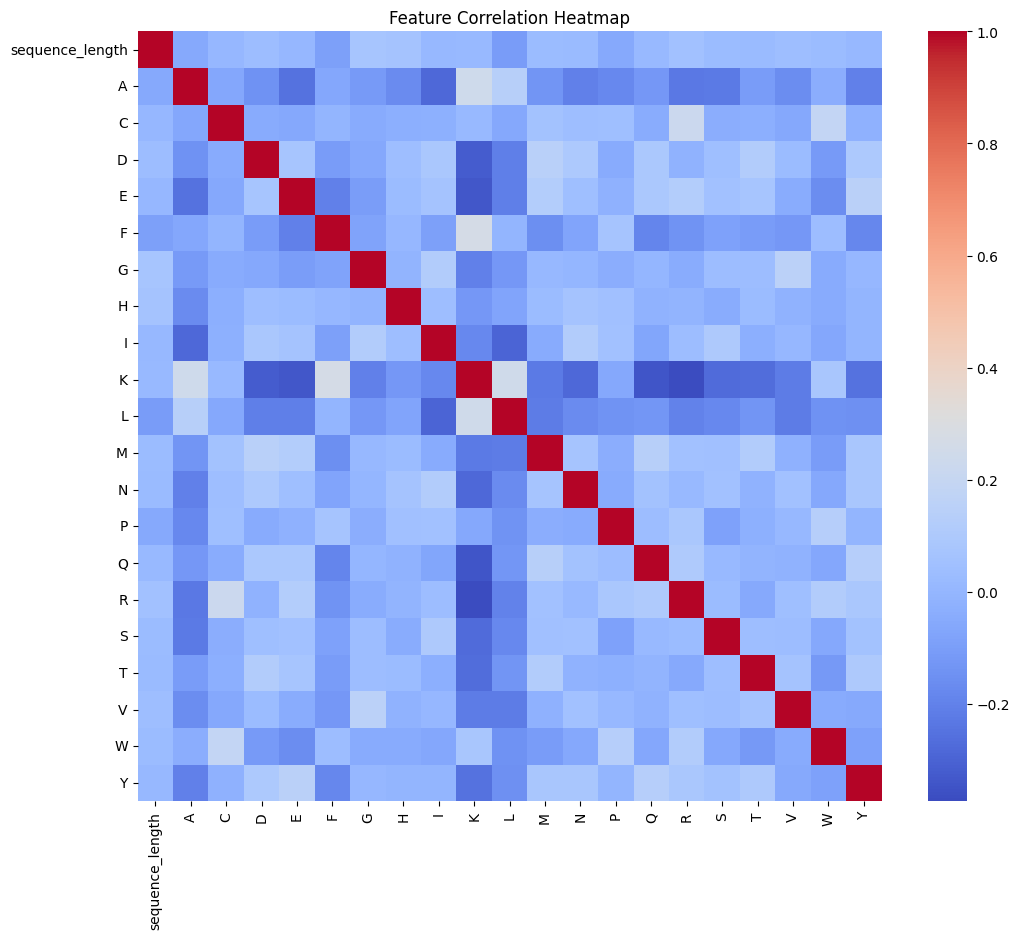

EDA and Feature Engineering Complete!



In [ ]:
# Step 3: Feature Engineering

# 1. Generate features: Amino acid composition (already included above)
# 2. Feature Correlation
correlation_matrix = features.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

print("EDA and Feature Engineering Complete!\n")


In [ ]:
pip install biopython

In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd

# Function to extract sequence-based descriptors
def extract_descriptors(sequence):
    analyzed_seq = ProteinAnalysis(sequence)

    # Calculate basic descriptors
    descriptors = {
        'molecular_weight': analyzed_seq.molecular_weight(),
        'aromaticity': analyzed_seq.aromaticity(),
        'instability_index': analyzed_seq.instability_index(),
        'isoelectric_point': analyzed_seq.isoelectric_point(),
        'gravy': analyzed_seq.gravy(),  # Grand average of hydropathicity
    }

    # Amino acid composition
    aa_composition = analyzed_seq.get_amino_acids_percent()
    for aa, value in aa_composition.items():
        descriptors[f'aa_{aa}'] = value  # Add as individual features

    return descriptors



In [ ]:
# Apply to dataset
data['descriptors'] = data['sequence'].apply(extract_descriptors)



/usr/local/lib/python3.12/dist-packages/Bio/SeqUtils/ProtParam.py:106: BiopythonDeprecationWarning: The get_amino_acids_percent method has been deprecated and will likely be removed from Biopython in the near future. Please use the amino_acids_percent attribute instead.
  warnings.warn(


In [ ]:
# Convert the descriptors dictionary into a DataFrame
descriptors_df = data['descriptors'].apply(pd.Series)



In [ ]:
# Combine with original data
data = pd.concat([data, descriptors_df], axis=1)



In [ ]:
data.head()

,ID,sequence,class,sequence_length,pca1,pca2,tsne1,tsne2,descriptors,molecular_weight,...,aa_M,aa_N,aa_P,aa_Q,aa_R,aa_S,aa_T,aa_V,aa_W,aa_Y
0,1,AAWKWAWAKKWAKAKKWAKAA,mod. active,21,4.262329,0.298899,27.009354,26.735142,"{'molecular_weight': 2485.9719999999998, 'arom...",2485.9720,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.238095,0.0
1,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active,23,6.262509,0.044535,35.517685,5.859898,"{'molecular_weight': 2480.9238, 'aromaticity':...",2480.9238,...,0.043478,0.043478,0.0,0.0,0.0,0.086957,0.000000,0.043478,0.000000,0.0
2,3,AWKKWAKAWKWAKAKWWAKAA,mod. active,21,4.262395,0.282747,26.974808,26.743801,"{'molecular_weight': 2601.104, 'aromaticity': ...",2601.1040,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.285714,0.0
3,4,ESFSDWWKLLAE,mod. active,12,-4.737702,-0.030385,-26.805658,-23.503735,"{'molecular_weight': 1510.6443, 'aromaticity':...",1510.6443,...,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.166667,0.0
4,5,ETFADWWKLLAE,mod. active,12,-4.737828,0.014415,-26.758511,-23.496660,"{'molecular_weight': 1508.6715, 'aromaticity':...",1508.6715,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.083333,0.000000,0.166667,0.0


In [ ]:
data.to_csv('/content/sample_data/AnticancerPeptides.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 949 non-null    int64  
 1   sequence           949 non-null    object 
 2   class              949 non-null    object 
 3   sequence_length    949 non-null    int64  
 4   pca1               949 non-null    float64
 5   pca2               949 non-null    float64
 6   tsne1              949 non-null    float32
 7   tsne2              949 non-null    float32
 8   descriptors        949 non-null    object 
 9   molecular_weight   949 non-null    float64
 10  aromaticity        949 non-null    float64
 11  instability_index  949 non-null    float64
 12  isoelectric_point  949 non-null    float64
 13  gravy              949 non-null    float64
 14  aa_A               949 non-null    float64
 15  aa_C               949 non-null    float64
 16  aa_D               949 non

In [ ]:
data.describe()

,ID,sequence_length,pca1,pca2,tsne1,tsne2,molecular_weight,aromaticity,instability_index,isoelectric_point,...,aa_M,aa_N,aa_P,aa_Q,aa_R,aa_S,aa_T,aa_V,aa_W,aa_Y
count,949.000000,949.000000,9.490000e+02,9.490000e+02,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,...,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,475.000000,16.737619,5.360891e-15,1.871820e-17,0.789747,-0.323654,1936.929483,0.098568,28.970879,7.648382,...,0.021543,0.031528,0.017464,0.039378,0.053209,0.046622,0.034427,0.057134,0.021445,0.024570
std,274.097002,4.983059,4.983081e+00,1.493004e-01,25.890961,20.879715,589.490108,0.078777,36.201824,2.642439,...,0.039128,0.046859,0.031817,0.055864,0.066343,0.059453,0.048860,0.063732,0.046369,0.041328
min,1.000000,5.000000,-1.173854e+01,-2.613621e-01,-45.998169,-39.369392,548.674800,0.000000,-55.170000,4.050028,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.000000,13.000000,-3.737729e+00,-9.872957e-02,-15.764820,-14.355333,1490.676200,0.050000,2.700000,4.996511,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,475.000000,16.000000,-7.376279e-01,-4.076563e-02,0.511496,0.105220,1813.015900,0.083333,24.873913,8.307799,...,0.000000,0.000000,0.000000,0.000000,0.043478,0.033333,0.000000,0.050000,0.000000,0.000000
75%,712.000000,20.000000,3.262186e+00,3.377547e-02,19.964527,10.450198,2276.629000,0.142857,48.930435,10.302064,...,0.043478,0.062500,0.037037,0.071429,0.086957,0.076923,0.066667,0.086957,0.026316,0.050000
max,949.000000,38.000000,2.126255e+01,4.189803e-01,51.204880,40.784866,4493.262900,0.400000,317.630000,11.999968,...,0.250000,0.250000,0.230769,0.363636,0.500000,0.357143,0.363636,0.416667,0.384615,0.230769


In [ ]:
data['class'].unique()

array(['mod. active', 'inactive - exp', 'very active',
       'inactive - virtual'], dtype=object)

In [ ]:
data.sequence_length.max()

38